## Advertising Sales Channel Prediction

In [13]:
# Introducing the liberaries

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
%matplotlib inline
import pickle

In [29]:
df = pd.read_csv("Advertisment.csv")
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [32]:
df.drop(columns='Unnamed: 0',inplace=True)

In [34]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


#### Features
TV fadio newspaper

#### Label
sales

In [35]:
df.index

RangeIndex(start=0, stop=200, step=1)

In [36]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

### EDA 

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [38]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [39]:
df.shape

(200, 4)

In [40]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

#### Ploting the relationship btw features and Label

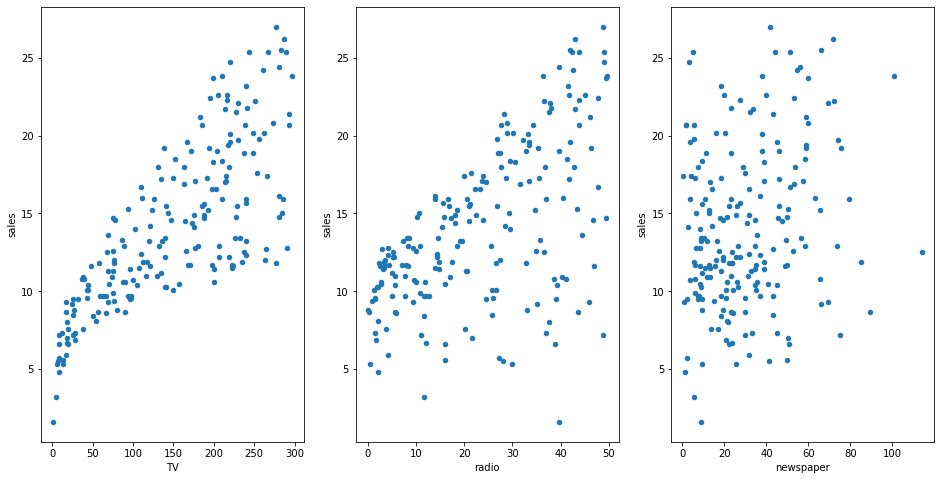

In [41]:
fig,axs = plt.subplots(1,3)

df.plot(kind='scatter',x='TV',y='sales',ax=axs[0],figsize=(16,8))
df.plot(kind='scatter',x='radio',y='sales',ax=axs[1])
df.plot(kind='scatter',x='newspaper',y='sales',ax=axs[2])
plt.show()

#### Checking Outliers

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


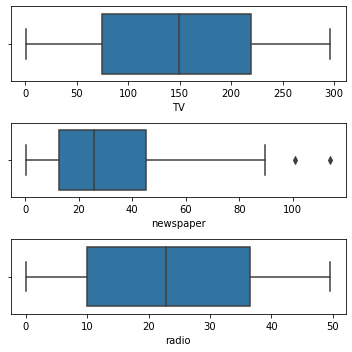

In [44]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['radio'], ax = axs[2])
plt.tight_layout()

There are no such considerable outliers present in the data

### Exploratory Data Analysis

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


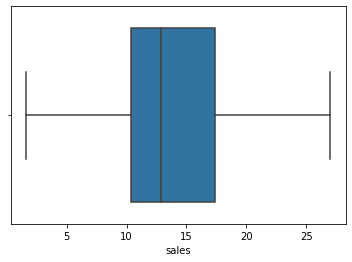

In [45]:
## Univariate Analysis

## Sales (Label)

sns.boxplot(df['sales'])
plt.show()

### Correlation

In [46]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


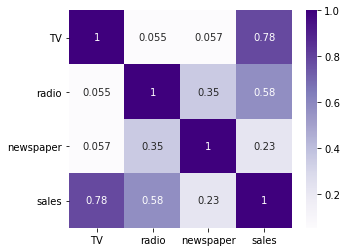

In [52]:
plt.figure(figsize=(5,4))
sns.heatmap(df.corr(),cmap="Purples", annot=True)
plt.yticks(rotation=0);
plt.show()

As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. So let's go ahead and perform simple linear regression using TV as our feature variable.

### Model Building


Performing Simple Linear Regression

Equation of linear regression

y=c+m1x1+m2x2+...+mnxn 

y  is the response

c  is the intercept

m1  is the coefficient for the first feature

mn  is the coefficient for the nth feature

In our case:

y=c+m1×TV 

The  m  values are called the model coefficients or model parameters.



### Spliting the Data

In [115]:
### Assigning the values
x = df[['TV']]
y = df['sales']

### Training the Model

In [116]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

In [72]:
x_train.head()

,TV
74,213.4
3,151.5
185,205.0
26,142.9
90,134.3


In [73]:
y_train.head()

74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
Name: sales, dtype: float64

### Building Model

In [117]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

#### Printing the Intercept and Coffiecient

In [118]:
print(lm.intercept_)
print(lm.coef_)

6.989665857411679
[0.04649736]


### Hypothesis Testing and Pvalues

In [119]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='sales~TV',data=df).fit()

#### Print P values for Model Cofficient

In [120]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

As the pvalues for TV ads is way less than 0.05, so there is relationship between TV and sales under Alternative Hypothesis

In [121]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           1.47e-42
Time:                        19:06:17   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Looking at some key statistics from the summary

The values we are concerned with are -

The coefficients and significance (p-values)

R-squared

F statistic and its significance

1. The coefficient for TV is 0.046, with a very low p value

The coefficient is statistically significant. So the association is not purely by chance.


2. R - squared is 0.897

Meaning that 89.7% of the variance in Sales is explained by TV

This is a decent R-squared value.

3. F statistic has a very low p value (practically low)

Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

#### Predicting the test results

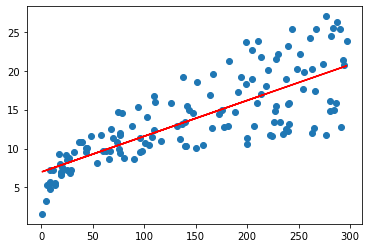

In [122]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.989 + 0.046*x_train, 'r')
plt.show()

In [130]:
from sklearn.metrics import r2_score
y_pred = lm.predict(x_test)
r2_score(y_test, y_pred)

0.5577827695264884

### Multiple Linear Regression

In [ ]:
### Now checking Confidence value of all features usnig Multiple Regression

In [112]:
x1 = df.drop(columns='sales')
y1 = df['sales']
lm = LinearRegression()
lm.fit(x1,y1)
print('Intercept : ',lm.intercept_)
print('TV        : ',lm.coef_[0])
print('radio     : ',lm.coef_[1])
print('newspaper : ',lm.coef_[2])

Intercept :  2.9388893694594067
TV        :  0.04576464545539761
radio     :  0.18853001691820462
newspaper :  -0.0010374930424762972


If We check the cofficients, newspaper spend is negetive which means that money spend on newspaper advertisment in not profitable

In [113]:
###  Sumaary of Linear Regression model
lm = smf.ols(formula='sales~TV+ radio+ newspaper',data=df).fit()

In [114]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           1.58e-96
Time:                        19:05:21   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

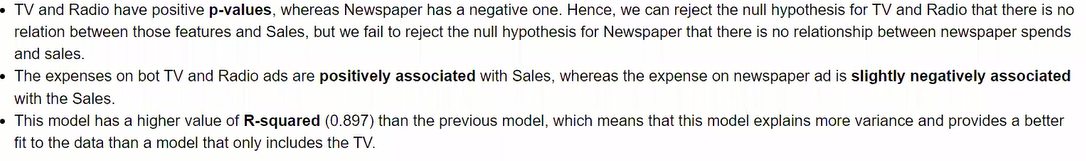

In [124]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.20,random_state=100)

In [125]:
mlm = LinearRegression()
mlm.fit(x_train,y_train)

LinearRegression()

In [126]:
y_pred = mlm.predict(x_test)

In [127]:
mlm.coef_

array([0.0455864 , 0.18569816, 0.00223281])

In [128]:
mlm.intercept_

2.8172751352950005

In [129]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9184369032278497

In [140]:
#Taking the input from the user
print("Enter the ammount you will invest on:")
tv = float(input("TV : "))
radio = float(input("radio : "))
newspaper = float(input("newspaper : "))

#predicting the sales with respect to the inputs
output = mlm.predict([[tv,radio,newspaper]])
print("You will get Rs.", output*100)

Enter the ammount you will invest on:
TV : 100
radio : 100
newspaper : 100
You will get Rs. [2616.90115977]


### Conclusion

In [142]:
import numpy as np
a = np.array(y_test)
predicted=np.array(lm.predict(x_test))
df_com = pd.DataFrame({'Original':a,'Predicted':predicted})
df_com

,Original,Predicted
0,6.6,7.403379
1,20.7,18.355821
2,17.2,13.459547
3,19.4,17.381320
4,21.8,18.522200
5,12.2,16.863171
6,12.2,13.649694
7,11.7,16.425834
8,22.6,17.319523
9,22.3,17.338537


### Saving File

In [144]:
import pickle
filename = 'Advertisment.pkl'
pickle.dump(lm,open(filename,'wb'))